<a href="https://colab.research.google.com/github/hrg921/deep-learning-from-scratch/blob/master/Deep_Learning_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning from Scratch

This notebook's purpose is to study the book 'Deep Learning from Scratch' by Saito Goki.

In [0]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## MNIST Database - Wikipedia
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.[1][2] The database is also widely used for training and testing in the field of machine learning.[3][4] It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.[5] Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.[5]

MNIST sample images.
The MNIST database contains 60,000 training images and 10,000 testing images.[6] Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.[7] There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%.[8] The original creators of the database keep a list of some of the methods tested on it.[5] In their original paper, they use a support vector machine to get an error rate of 0.8%.[9] An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.[10]

In [0]:
# https://github.com/ziwon/deep-learning-from-scratch/blob/master/dataset/mnist.py
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.realpath("__file__"))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_ont_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_ont_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_ont_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [0]:
import sys

### Test Data Load

In [38]:
sys.path.append(os.pardir)

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Test Image Open

In [0]:
from PIL import Image
from IPython.display import display

In [0]:
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  display(pil_img)

In [41]:
img0 = x_train[0].reshape(28, 28)
img1 = x_train[1].reshape(28, 28)
img2 = x_train[2].reshape(28, 28)

label0 = t_train[0]
label1 = t_train[1]
label2 = t_train[2]

print(label0)
img_show(img0)
print(label1)
img_show(img1)
print(label2)
img_show(img2)

5


0


4


## Perceptron

### Wikipedia
In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

#### AND Gate

##### Truth Table
| x<sub>1</sub> | x<sub>2</sub> | y |
|---------------|---------------|---|
| 0             | 0             | 0 |
| 1             | 0             | 0 |
| 0             | 1             | 0 |
| 1             | 1             | 1 |

##### Mathematical Expression
$$
b = -0.7 \\
w_1 = 0.5 \\
w_2 = 0.5\\
$$
$$
y =
\begin{cases}
 \ 1 \,\,(b + w_1x_1+w_2x_2 \geq 0) \\
 \ 0 \,\,(b + w_1x_1+w_2x_2 < 0)
\end{cases}
$$

In [0]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w * x) + b
  
  if tmp <= 0:
    return 0
  else:
    return 1

In [44]:
print("AND 0, 0: ", AND(0, 0))
print("AND 0, 1: ", AND(0, 1))
print("AND 1, 0: ", AND(1, 0))
print("AND 1, 1: ", AND(1, 1))

AND 0, 0:  0
AND 0, 1:  0
AND 1, 0:  0
AND 1, 1:  1


#### NAND Gate

##### Truth Table
| x<sub>1</sub> | x<sub>2</sub> | y |
|---------------|---------------|---|
| 0             | 0             | 1 |
| 1             | 0             | 1 |
| 0             | 1             | 1 |
| 1             | 1             | 0 |

##### Mathematicl Expression
$$
b = 0.7 \\
w_1 = -0.5 \\
w_2 = -0.5\\
$$
$$
y =
\begin{cases}
 \ 1 \,\,(b + w_1x_1+w_2x_2 \geq 0) \\
 \ 0 \,\,(b + w_1x_1+w_2x_2 <0)
\end{cases}
$$

In [0]:
def NAND(x1, x2):
  tmp = AND(x1, x2)
  if tmp == 0:
    return 1
  else:
    return 0

In [46]:
print("NAND 0, 0: ", NAND(0, 0))
print("NAND 0, 1: ", NAND(0, 1))
print("NAND 1, 0: ", NAND(1, 0))
print("NAND 1, 1: ", NAND(1, 1))

NAND 0, 0:  1
NAND 0, 1:  1
NAND 1, 0:  1
NAND 1, 1:  0


#### OR Gate

##### Truth Table
| x<sub>1</sub> | x<sub>2</sub> | y |
|---------------|---------------|---|
| 0             | 0             | 0 |
| 1             | 0             | 1 |
| 0             | 1             | 1 |
| 1             | 1             | 1 |

##### Mathematical Expression
$$
b = - 0.2 \\
w_1 = 0.5 \\
w_2 = 0.5 \\
$$
$$
y =
\begin{cases}
 \ 1 \,\,(b + w_1x_1+w_2x_2 \geq 0) \\
 \ 0 \,\,(b + w_1x_1+w_2x_2 <0)
\end{cases}
$$

In [0]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w * x) + b
  
  if tmp >= 0:
    return 1
  else:
    return 0

In [48]:
print("OR 0, 0: ", OR(0, 0))
print("OR 0, 1: ", OR(0, 1))
print("OR 1, 0: ", OR(1, 0))
print("OR 1, 1: ", OR(1, 1))

OR 0, 0:  0
OR 0, 1:  1
OR 1, 0:  1
OR 1, 1:  1


#### XOR Gate

##### Truth Table
| x<sub>1</sub> | x<sub>2</sub> | y |
|---------------|---------------|---|
| 0             | 0             | 0 |
| 1             | 0             | 1 |
| 0             | 1             | 1 |
| 1             | 1             | 0 |

##### Mathematical Expression
No Mathematical Expression because XOR cannot be represented by linear function.

In [0]:
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1, x2))

In [50]:
print("XOR 0, 0: ", XOR(0, 0))
print("XOR 0, 1: ", XOR(0, 1))
print("XOR 1, 0: ", XOR(1, 0))
print("XOR 1, 1: ", XOR(1, 1))

XOR 0, 0:  0
XOR 0, 1:  1
XOR 1, 0:  1
XOR 1, 1:  0


## Neural Network Basic
In perceptron, we decided weight and bias in hand.

### Wikipedia
A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes.[1] Thus a neural network is either a biological neural network, made up of real biological neurons, or an artificial neural network, for solving artificial intelligence (AI) problems. The connections of the biological neuron are modeled as weights. A positive weight reflects an excitatory connection, while negative values mean inhibitory connections. All inputs are modified by a weight and summed. This activity is referred as a linear combination. Finally, an activation function controls the amplitude of the output. For example, an acceptable range of output is usually between 0 and 1, or it could be −1 and 1.

![Simple Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1280px-Neural_network_example.svg.png =150x)


### Activation Function

#### Wikipedia
In artificial neural networks, the activation function of a node defines the output of that node, or "neuron," given an input or set of inputs. This output is then used as input for the next node and so on until a desired solution to the original problem is found.

It maps the resulting values into the desired range such as between 0 to 1 or -1 to 1 etc. (depending upon the choice of activation function). For example, the use of the logistic activation function would map all inputs in the real number domain into the range of 0 to 1.

A standard computer chip circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, only nonlinear activation functions allow such networks to compute nontrivial problems using only a small number of nodes. In artificial neural networks, this function is also called the transfer function.

##### Example - Logistic Activation function
![Logistic Activation Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/2560px-Logistic-curve.svg.png =x150)

#### Step Function

##### Mathematical Expression
$$
h(x) =
\begin{cases}
 \ 1 \,\,(x > 0) \\
 \ 0 \,\,(x \leq 0)
\end{cases}
$$

In [0]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

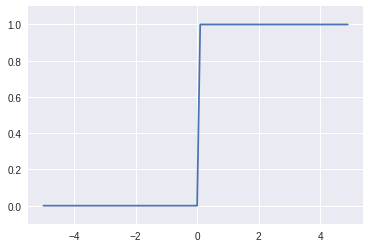

In [52]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### Sigmoid Function

##### Mathematical Expression
$$
h(x) = \frac{1}{1 + \exp(-x)}
$$

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

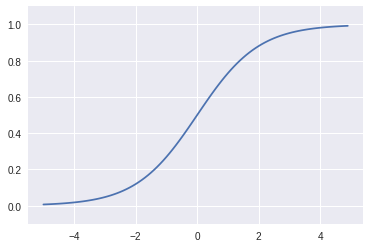

In [54]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y axis scope
plt.show()

#### Step Function vs Sigmoid Function
Step Function is linear function, Sigmoid Function is non-linear function. Linear function is literaly linear function which can be represented by one line, non-linear function is the opposite thing.

##### Linear function in neural network
In nerual network, we should use non-linear function because if we use linear function there's no merit to deepen the hidden layer.

#### ReLU Function

##### Mathematical Expression
$$
h(x) = 
\begin{cases}
 \ x \,\,(x > 0) \\
 \ 0 \,\,(x \leq 0)
\end{cases}
$$

In [0]:
def relu(x):
  return np.maximum(0, x)

<function matplotlib.pyplot.show>

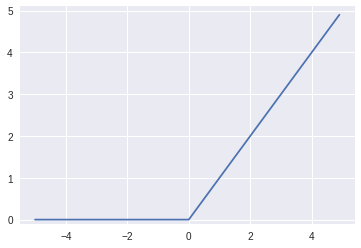

In [56]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5.1) # y axis scope
plt.show

### Output Function
According to problem, appropriate output function is different

#### Identity Function

In [0]:
def identity_function(x):
  return x

#### Softmax Function

##### Mathematical Expression
$$
y_k = \frac{\exp{(a_k)}}{\sum\limits^{n}_{i=1}\exp{(a_i)}}
$$

##### Characteristic
Summation is 1, so we can understand the output as probability.

In [58]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


##### Caution!
$e^{1000}$ is infinite value, so we have to improve this function

###### Improved Softmax for programming
$$
\begin{split}
y_k = \frac{\exp{(a_k)}}{\sum\limits^{n}_{i=1}\exp{(a_i)}}
&= \frac{C\exp{(a_k)}}{C\sum\limits^{n}_{i=1}\exp{(a_i)}} \\
&= \frac{\exp{(a_k + \log{C})}}{\sum\limits^{n}_{i=1}\exp{(a_i  + \log{C})}} \\
&= \frac{\exp{(a_k + \log{C^{'}})}}{\sum\limits^{n}_{i=1}\exp{(a_i  + \log{C^{'}})}}
\end{split}
$$

In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

### Three-Layer Neural Network
By using numpy, we can easily implement signal transmission.

#### First Layer
$$
\mathbf{A} ^{(1)} = \mathbf{XW}^{(1)} + \mathbf{B}^{(1)}
$$
<!-- mathbf: bold -->

##### First Layer Matrices
$$
\mathbf{X} = \left({\begin{array}{cc} x_1 & x_2 \end{array}}\right)
\\
\mathbf{A}^{(1)} = \left({\begin{array}{ccc} a_1^{(1)} & a_2^{(1)} & a_3^{(1)} \end{array}}\right)
\\
\mathbf{B}^{(1)} = \left({\begin{array}{ccc} b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \end{array}}\right)
\\~\\
\mathbf{W}^{(1)} 
= \left({\begin{array}{ccc} 
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{array}}\right)
$$

In [60]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(X.shape)
print(W1.shape)
print(B1.shape)
print(A1.shape, end='\n\n')

print(A1)
print(Z1)

(2,)
(2, 3)
(3,)
(3,)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### Second Layer

In [61]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z1.shape)
print(W2.shape)
print(B2.shape)
print(A2.shape, end='\n\n')

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
(2,)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


#### Third Layer

In [62]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # same with Y = A3

print(Y)

[0.31682708 0.69627909]


#### Three-Layer Neural Network Class

In [0]:
class ThreeLayerNeuralNetwork:
  def __init__(self):
    self.network = {}
    self.network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    self.network['b1'] = np.array([0.1, 0.2, 0.3])
    self.network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    self.network['b2'] = np.array([0.1, 0.2])
    self.network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    self.network['b3'] = np.array([0.1, 0.2])
  
  def forward(self, x):
    network = self.network
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [64]:
network = ThreeLayerNeuralNetwork()
x = np.array([1.0, 0.5])
y = network.forward(x)

print(y)

[0.31682708 0.69627909]


## Matrix & Numpy


### Multidimensional Matrix

In [65]:
A = np.array([1, 2, 3, 4])

print("A: ", A)
print("Dimension of A: ", np.ndim(A))
print("Shape of A: ", A.shape)
print("Type of A.shape: ", type(A.shape))
print("A.shape[0]: ", A.shape[0])
print("type(A.shape[0]): ", type(A.shape[0]))

print()

B = np.array([[1, 2], [3, 4], [5, 6]])
print("B: \n", B)
print("Dimension of B: ", np.ndim(B))
print("Shape of B: ", B.shape)
print("Type of B.shape: ", type(B.shape))
print("B.shape[0]: ", B.shape[0])
print("type(B.shape[0]): ", type(B.shape[0]))

A:  [1 2 3 4]
Dimension of A:  1
Shape of A:  (4,)
Type of A.shape:  <class 'tuple'>
A.shape[0]:  4
type(A.shape[0]):  <class 'int'>

B: 
 [[1 2]
 [3 4]
 [5 6]]
Dimension of B:  2
Shape of B:  (3, 2)
Type of B.shape:  <class 'tuple'>
B.shape[0]:  3
type(B.shape[0]):  <class 'int'>


### Matrix Multiplication

In [66]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A.shape == B.shape)
print(np.dot(A, B))

True
[[19 22]
 [43 50]]


In [67]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

print(np.dot(A, B))

[[22 28]
 [49 64]]
